In [1]:
from tensorflow.keras.datasets import mnist
(X,Y),(X_test,Y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print("X Shape" , X.shape)
print("Y shape" , Y.shape)
print("X Test", X_test.shape)
print("Y Test", Y_test.shape)


X Shape (60000, 28, 28)
Y shape (60000,)
X Test (10000, 28, 28)
Y Test (10000,)


In [3]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [4]:
import numpy as np

Plotting a few training images

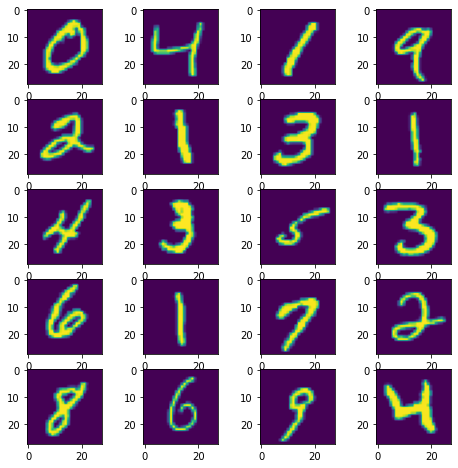

In [5]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X[i])
plt.show()

In [6]:
X = X.reshape(len(X),784)

In [7]:
X.shape

(60000, 784)

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(290,))
clf.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(290,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Plotting a few test images

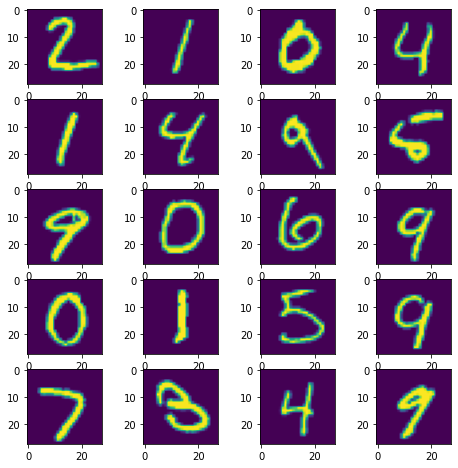

In [10]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i])
plt.show()

In [11]:
X_test = X_test.reshape(len(X_test),784)

In [12]:
Y_predict = clf.predict(X_test)

In [13]:
score = 0
for i in range(Y_test.size):
  if (Y_predict[i] == Y_test[i]):
    score = score + 1


In [14]:
print("Number of correctly classified images = ",score)
print("Number of wrongly classified images = ", (Y_test.size - score) )
accuracy = (score/(Y_test.size)) * 100
print("Model Accuracy = ",accuracy,"%")

Number of correctly classified images =  9738
Number of wrongly classified images =  262
Model Accuracy =  97.38 %


Printing about 20 wrongly sampled image  

Predicted =  3 Actual Label =  9


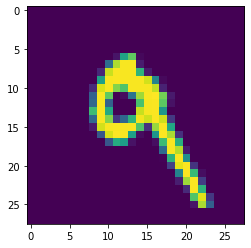

Predicted =  3 Actual Label =  1


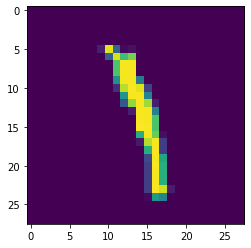

Predicted =  4 Actual Label =  7


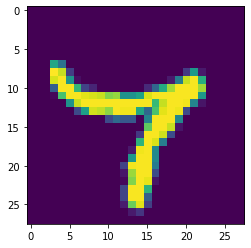

Predicted =  9 Actual Label =  2


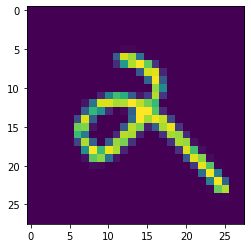

Predicted =  8 Actual Label =  9


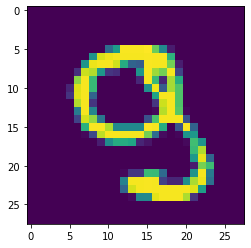

Predicted =  2 Actual Label =  3


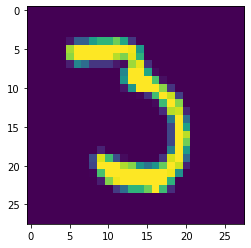

Predicted =  8 Actual Label =  9


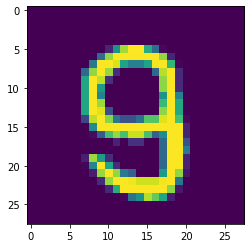

Predicted =  2 Actual Label =  4


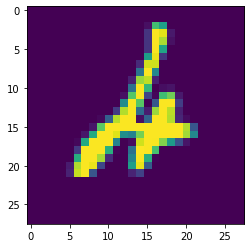

Predicted =  5 Actual Label =  8


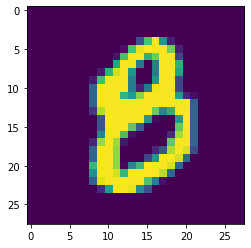

Predicted =  8 Actual Label =  9


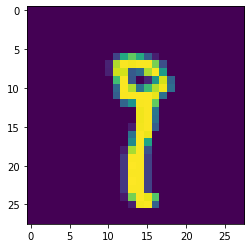

Predicted =  7 Actual Label =  2


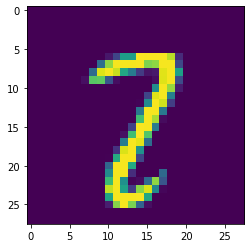

Predicted =  0 Actual Label =  6


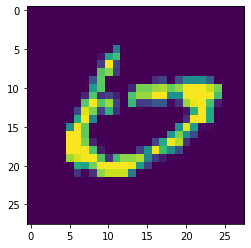

Predicted =  7 Actual Label =  4


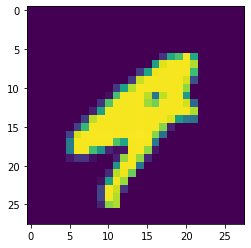

Predicted =  0 Actual Label =  8


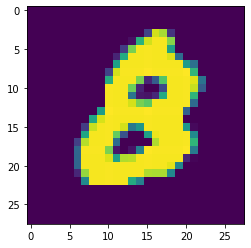

Predicted =  2 Actual Label =  8


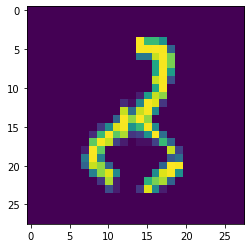

Predicted =  4 Actual Label =  8


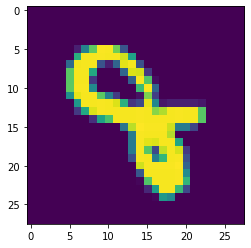

Predicted =  8 Actual Label =  5


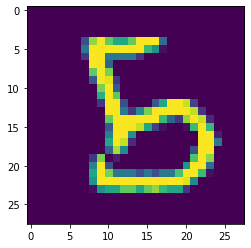

Predicted =  7 Actual Label =  8


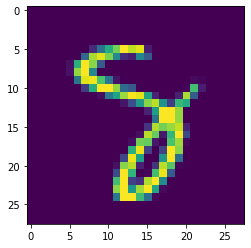

Predicted =  5 Actual Label =  8


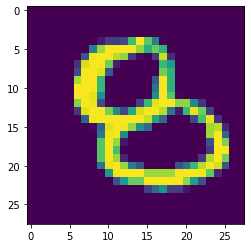

Predicted =  4 Actual Label =  9


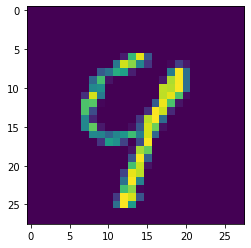

Predicted =  5 Actual Label =  6


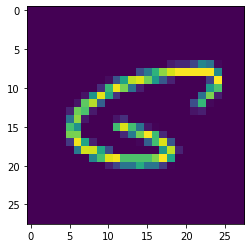

In [15]:
X_test = X_test.reshape(len(X_test),28,28)
j = 0
for i in range(len(Y_test)):
  if (Y_predict[i] != Y_test[i]) and (j<=20):
    j = j+1
    print("Predicted = ", Y_predict[i],"Actual Label = ",Y_test[i])
    plt.imshow(X_test[i])
    plt.show()


In [16]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


[[ 974    0    2    0    0    0    1    1    2    0]
 [   0 1122    2    2    2    2    1    0    4    0]
 [   7    1 1006    0    0    0    3   11    3    1]
 [   2    0   13  978    0    8    0    5    3    1]
 [   1    1    3    0  953    0    7    5    0   12]
 [   2    1    1    8    0  865    5    1    6    3]
 [   3    3    1    1    1    2  947    0    0    0]
 [   2    0    7    2    3    0    0 1005    3    6]
 [  12    1    9    3    6    7    4    6  922    4]
 [   5    3    0    8   12    1    0    8    6  966]]


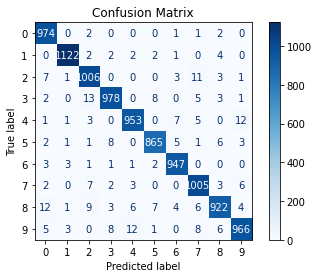

In [17]:
x_test = X_test.reshape(len(X_test),784)

disp = plot_confusion_matrix(clf, x_test, Y_test, cmap=plt.cm.Blues,values_format = '0')
disp.ax_.set_title("Confusion Matrix")
print()
print(disp.confusion_matrix)

plt.show()